# Arbres de décisions

## On importe les bibliothèques nécessaires
* pandas
* numpy
* matplotlib
* seaborn

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## Récupération des informations
* Voyons ce que contient le fichier
    * Classification 1 : En bonne santé
    * Classification 2 : Atteint

In [2]:
data = pd.read_csv('breastCancer.csv')
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


## Vérifions si les cibles sont équilibrées

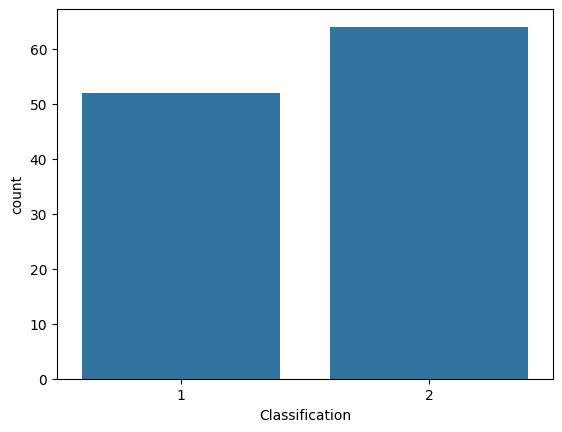

In [3]:
x = data['Classification']
ax = sns.countplot(x = x, data = data)

# Visualisation des données
* Nous allons mettre en place une visualisation de chaque paramètre pour tenter de voir s'il y a un impact significatif

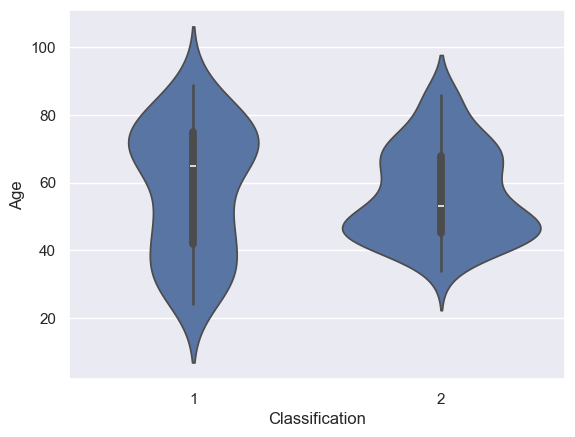

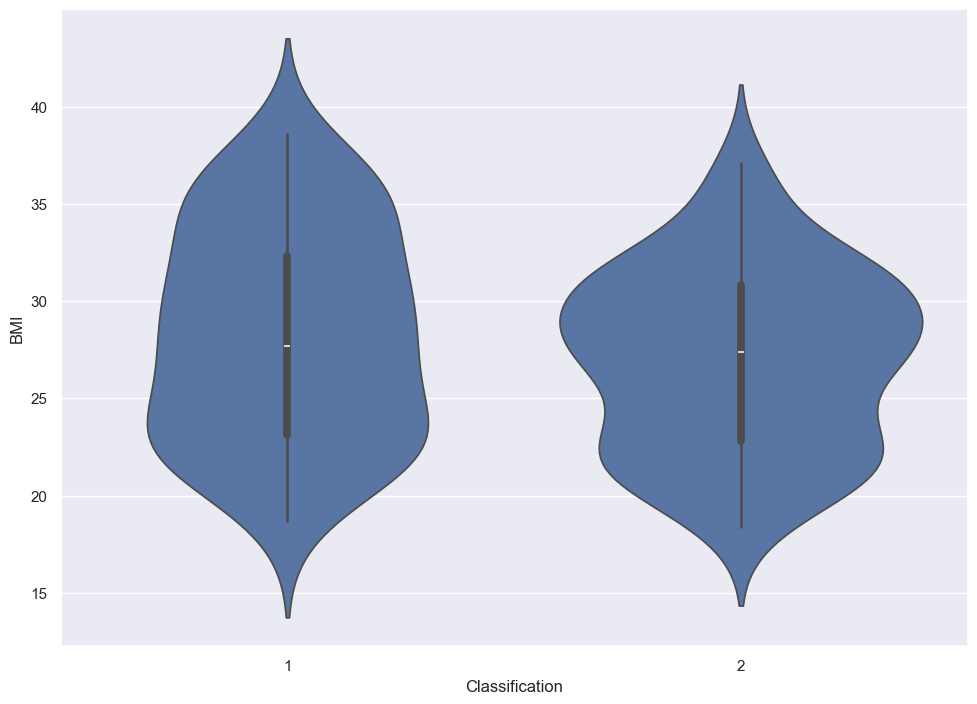

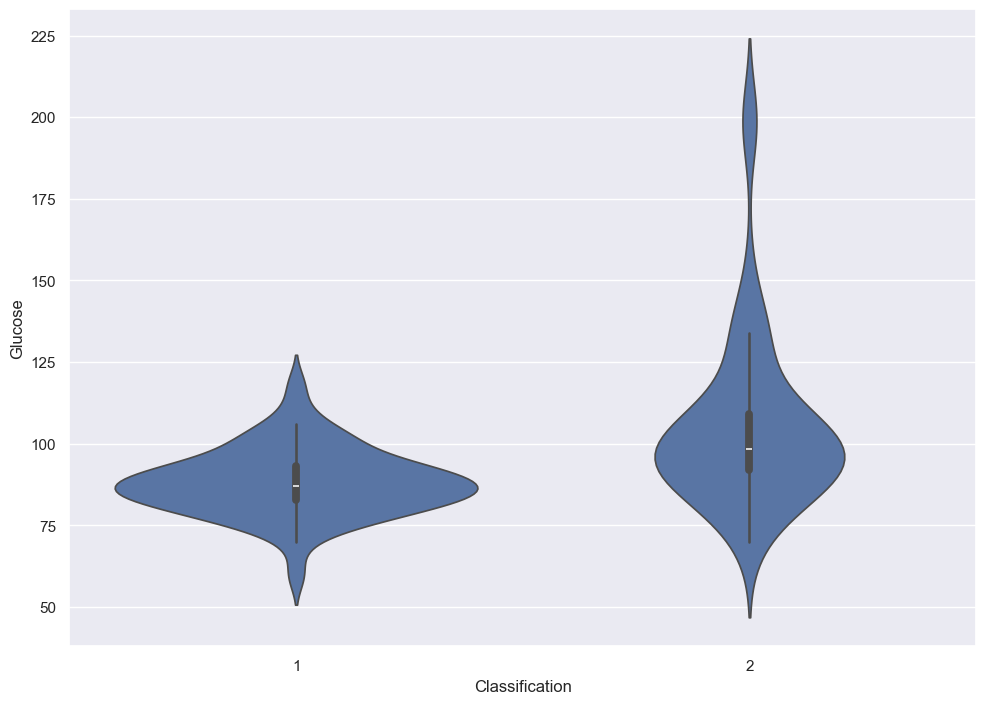

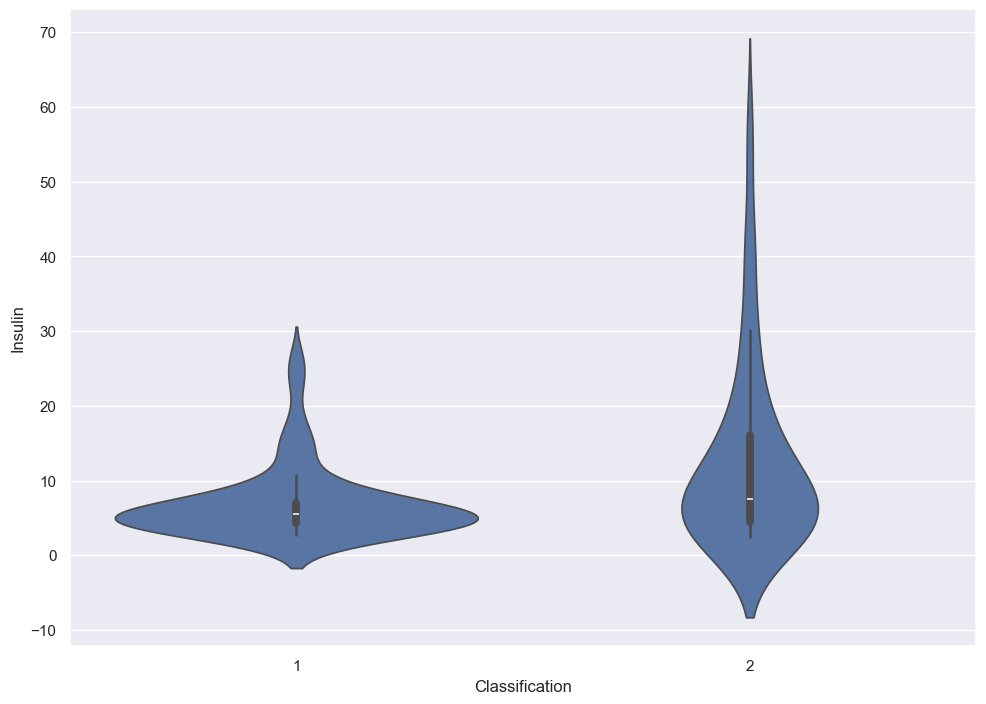

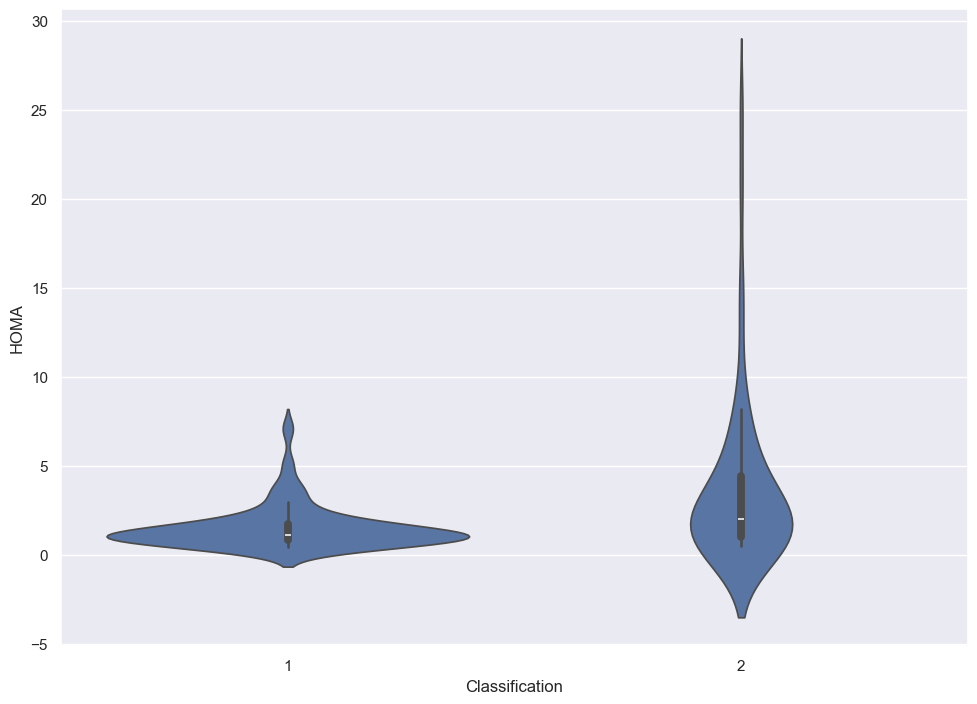

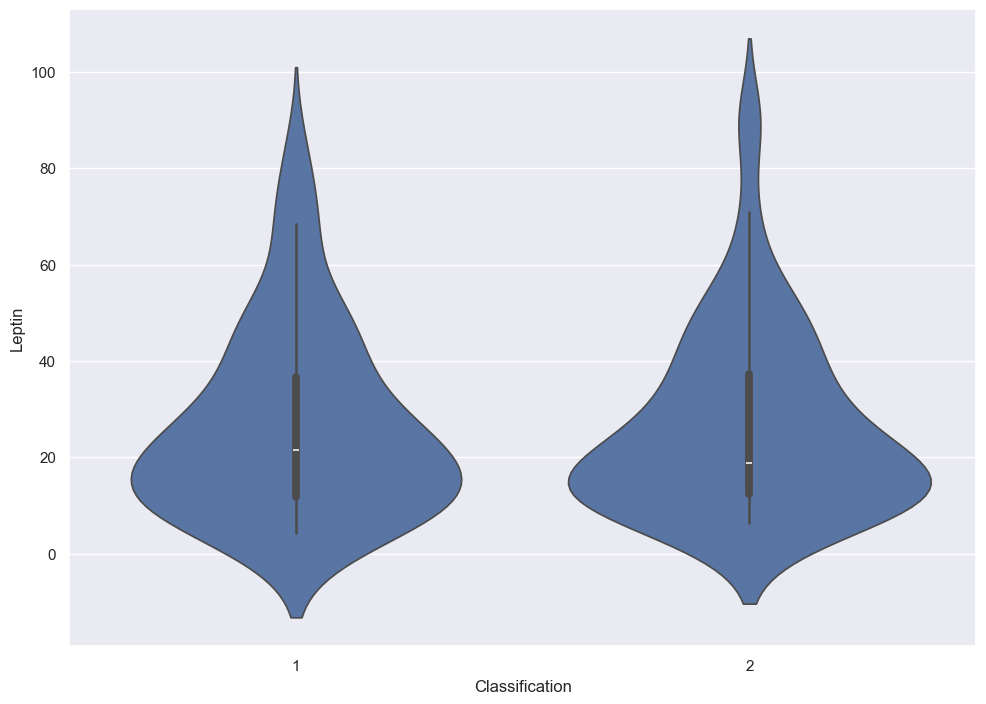

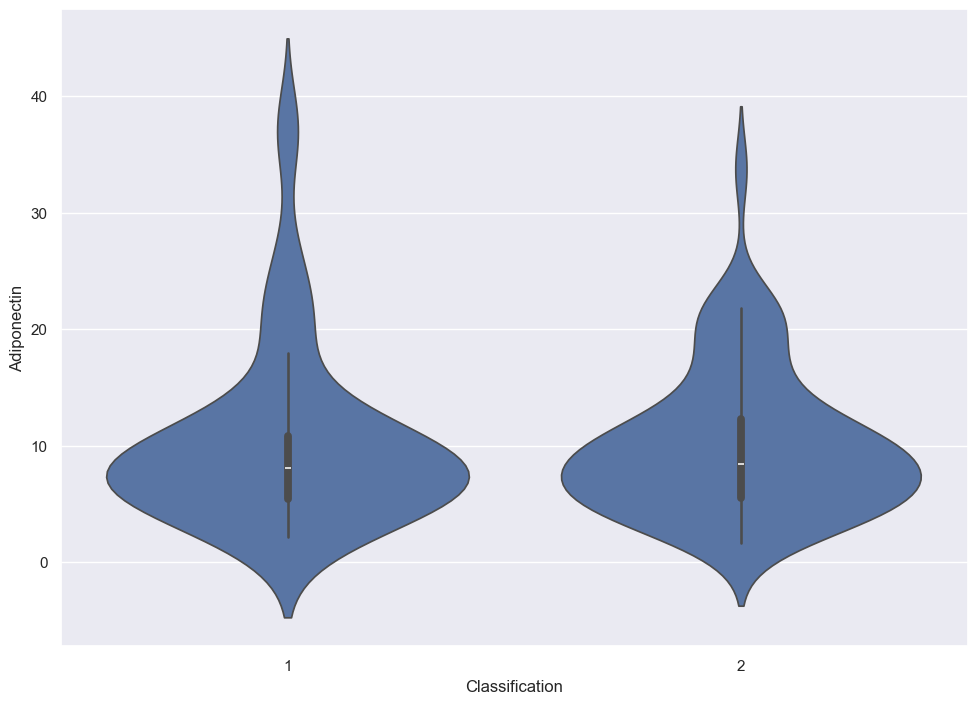

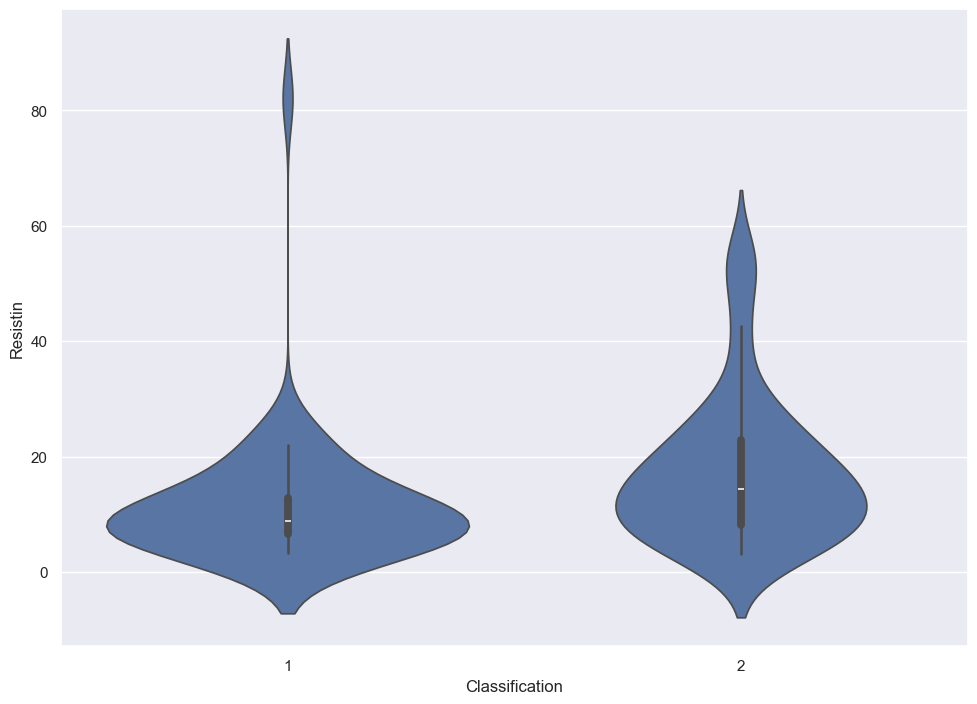

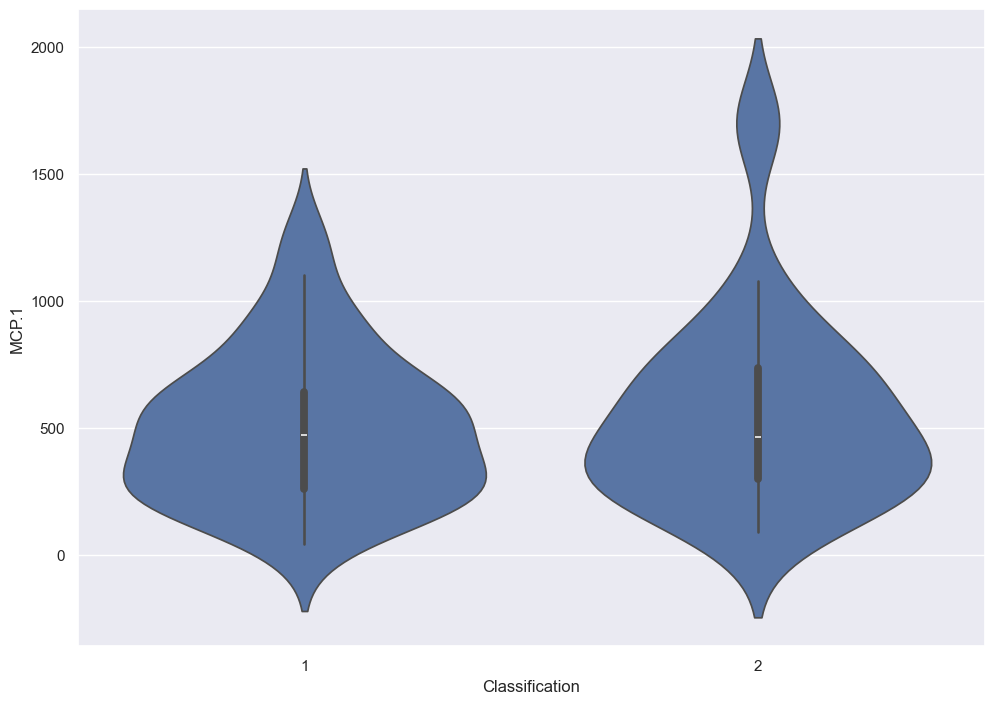

In [8]:
def violon_plots(x, y, data):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize' : (11.7, 8.27)})
        ax = sns.violinplot(x= x, y = col, data=data)

y = data.columns[:-1]
x = data.columns[-1]

violon_plots(x, y, data)

## Vérification des données manquantes
* Nous allons nettoyer le fichier des données manquantes

In [9]:
for col in data.columns:
    print(f'{col} : {data[col].isnull().sum()}')

Age : 0
BMI : 0
Glucose : 0
Insulin : 0
HOMA : 0
Leptin : 0
Adiponectin : 0
Resistin : 0
MCP.1 : 0
Classification : 0


## Rendre les données exploitables
* Les critères ne sont pas numériques et sont difficilement exploitables
* Il faut les convertir
* Commençons par la cible (les valeurs cibles prennent les valeurs 0 et 1)
* Les données paramètres sont déjà numériques, nous ne ferons aucune transformation

In [7]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


## Mise en place du modèle
* La première étape consiste à séparer les données d'entrainement des données de test

In [8]:
from sklearn.model_selection import train_test_split

y = data['Classification'].values.reshape(-1, 1)
x = data.drop(['Classification'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.1, random_state=42)

* Mise en place du modèle de base avec arbre de décisions
* Entrainement du modèle avec les données d'entrainement
* Mise en place d'une prédiction à partir des paramètres de test

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions =clf.predict(x_test)
predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

## Validation de notre modèle
* Il est temps de confronter la prédiction à la situation réelle des patients
* Nous allons représenter les données grâce à la matrice de confusion :
    * Les lignes correspondent aux valeurs observées 
    * Les colonnes correspondent aux valeurs prédites
* Les valeurs sur la diagonale indiquent donc les bonnes prévisions

In [18]:
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions =clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm

array([[6, 3],
       [0, 3]], dtype=int64)

* Il est possible de visualiser graphiquement la matrice de confusion
    * En haut à gauche : Les Vrais positifs
    * En haut à droite : Les Faux positifs
    * En bas à gauche : Les Faux négatifs
    * En bas à droite : Les Vrais négatifs

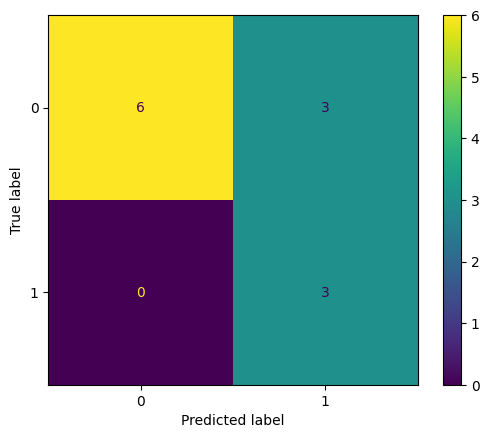

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()

## Représentons l'arbre de décisions 
* La première ligne donne un test, si le test est validé, on part à gauche, sinon, on part à droite
* Samples indique le nombre d'individus à ce niveau
* Values donne la répartition des individus en fonction du test
* Class donne l'état de la majorité des individus

[Text(0.4583333333333333, 0.9, 'Glucose <= 91.5\ngini = 0.485\nsamples = 104\nvalue = [43, 61]\nclass = Malade'),
 Text(0.25, 0.7, 'Age <= 44.5\ngini = 0.454\nsamples = 43\nvalue = [28.0, 15.0]\nclass = Pas malade'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Pas malade'),
 Text(0.3333333333333333, 0.5, 'Resistin <= 14.227\ngini = 0.5\nsamples = 30\nvalue = [15, 15]\nclass = Pas malade'),
 Text(0.16666666666666666, 0.3, 'Age <= 46.5\ngini = 0.36\nsamples = 17\nvalue = [13, 4]\nclass = Pas malade'),
 Text(0.08333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.3, 'BMI <= 31.124\ngini = 0.26\nsamples = 13\nvalue = [2, 11]\nclass = Malade'),
 Text(0.4166666666666667, 0.1, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.1, '\n  (...)  \n'),
 Text(0.6666666666666666, 0.7, 'Leptin <= 7.24\ngini = 0.371\nsamples = 61\nvalue = [15, 46]\nclass = Malade'),
 Text(0.5833333333333334, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [

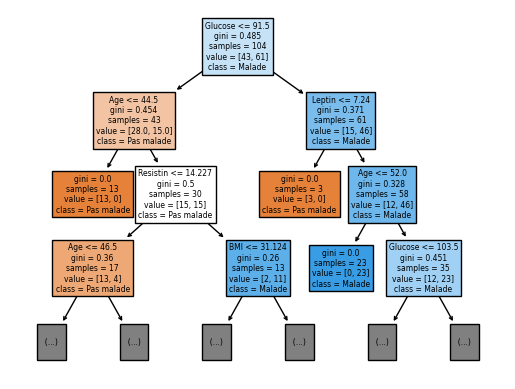

In [23]:
from sklearn.tree import plot_tree 
plot_tree(clf, max_depth=3, filled=True, feature_names=data.columns, class_names=['Pas malade', 'Malade'])

## Utilisation de l'algorithme Bagging
* Cet algorithme créé des sous ensembles aléatoires des données de départ puis aggrège les prédictions des différents sous ensembles
* Cette façon de faire prend plus de temps mais évite les problèmes d'overfitting

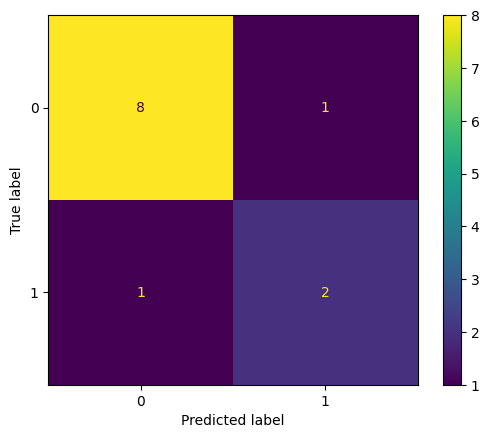

In [25]:
from sklearn.ensemble import BaggingClassifier
bagClf = BaggingClassifier()
bagClf.fit(x_train, y_train.ravel())

predictions =bagClf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()


## Utilisation de l'algorithme de la forêt aléatoire
* Cet algorithme créé des sous ensembles aléatoires des données de départ et améliore la prédiction par la moyenne des prédictions des différents sous ensembles
* Cette façon de faire prend plus de temps mais évite les problèmes d'overfitting

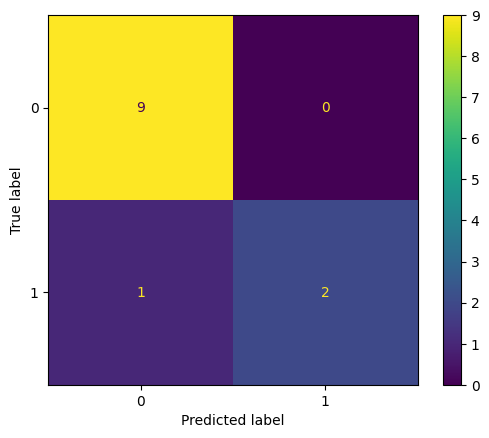

In [27]:
from sklearn.ensemble import RandomForestClassifier
forClf = RandomForestClassifier()
forClf.fit(x_train, y_train.ravel())

predictions =forClf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()